# Quick start with micro-sam

This notebook shows the very basics necessary to segment an image using [micro-sam](https://github.com/computational-cell-analytics/micro-sam).  

## Installation

You can install micro-sam in a conda environment like this. If you never worked with conda-environments before, consider reading [this blog post](https://biapol.github.io/blog/mara_lampert/getting_started_with_miniforge_and_python/readme.html) first.
```
mamba install -y -q -c conda-forge micro_sam
```

For result visualization we use [stackview]() which can be installed using pip.
```
pip install stackview
```

First we import the required libraries.

In [1]:
from micro_sam.automatic_segmentation import get_predictor_and_segmenter, automatic_instance_segmentation
from skimage.data import cells3d
import stackview

We load an example 2D image from the [scikit-image](https://scikit-image.org/docs/stable/api/skimage.data.html) library.

StackViewNDArray([[4496, 5212, 6863, ..., 2917, 2680, 2642],
                  [4533, 5146, 7555, ..., 2843, 2857, 2748],
                  [4640, 6082, 8452, ..., 3372, 3039, 3128],
                  ...,
                  [1339, 1403, 1359, ..., 4458, 4314, 4795],
                  [1473, 1560, 1622, ..., 3967, 4531, 4204],
                  [1380, 1368, 1649, ..., 3091, 3558, 3682]], dtype=uint16)
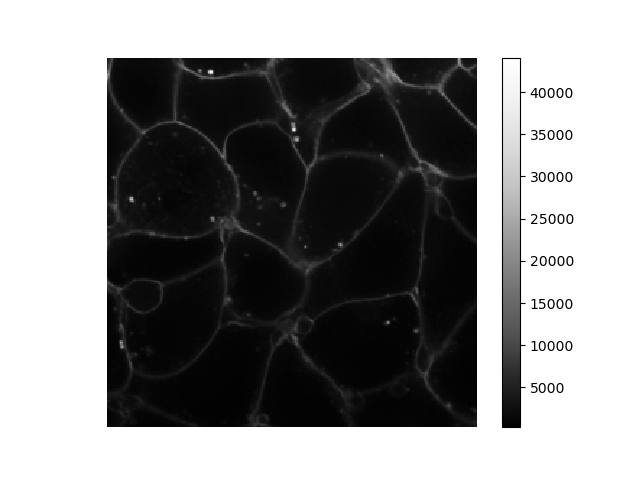
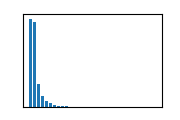

In [2]:
image = cells3d()[30,0]

stackview.insight(image)

Loading a pre-trained micro-sam model and applying it to an image just takes two lines of python code:

Initialize instance segmentation with decoder: 100%|█████████████████████████████████████| 1/1 [00:00<00:00,  5.14it/s]


StackViewNDArray([[ 6,  6,  6, ...,  5,  5,  5],
                  [ 6,  6,  6, ...,  5,  5,  5],
                  [ 6,  6,  6, ...,  5,  5,  5],
                  ...,
                  [39, 39, 39, ..., 37, 37, 37],
                  [39, 39, 39, ..., 37, 37, 37],
                  [39, 39, 39, ..., 37, 37, 37]])
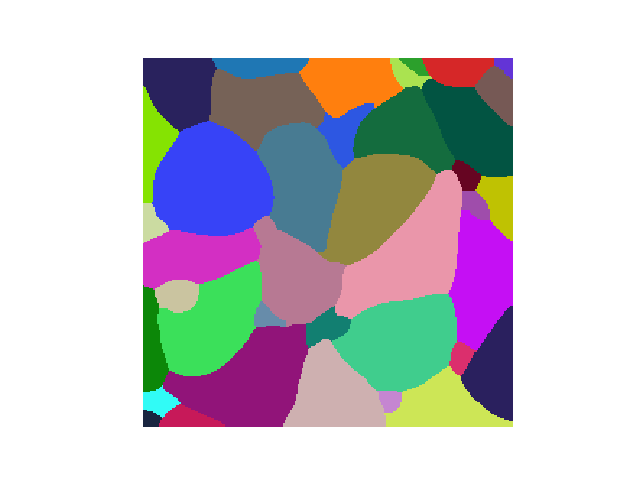

In [3]:
# Load model
predictor, segmenter = get_predictor_and_segmenter(model_type="vit_b_lm")

# Apply model
label_image = automatic_instance_segmentation(predictor=predictor, segmenter=segmenter, input_path=image)

# Visualize result
stackview.insight(label_image)

We can also quickly show the result using an animated curtain.


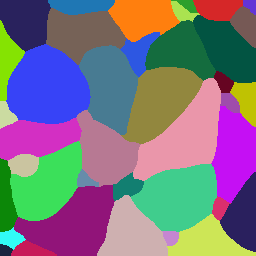

In [4]:
stackview.animate_curtain(image, label_image)